# Test 1 — Classification: Adult Income

**Name:** María Donoso
**Date:** 22/09/2025

The main goal of this notebook is to select and train different classification models on our data. 

First of all, we select our environment previously created as the kernel for this notebook and run the following cell:

In [17]:
import sys
import random
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import joblib
import warnings
warnings.filterwarnings('ignore')


# reproducibility
RANDOM_STATE = 42
np.random.seed(RANDOM_STATE)
random.seed(RANDOM_STATE)


# package versions
import sklearn
print('python', sys.version.split()[0])
print('pandas', pd.__version__)
print('numpy', np.__version__)
print('scikit-learn', sklearn.__version__)
print('matplotlib', plt.matplotlib.__version__)
print('seaborn', sns.__version__)


# plot defaults
%matplotlib inline
plt.rcParams['figure.figsize'] = (8,5)

python 3.10.18
pandas 2.3.2
numpy 2.2.6
scikit-learn 1.7.2
matplotlib 3.10.6
seaborn 0.13.2


In [18]:
import mlflow
import mlflow.sklearn
mlflow.set_tracking_uri("file:///c:/Users/Maria/Desktop/CAPGEMINI/MDI-TestDataScience-1/mlruns")
mlflow.set_experiment("adult_income_models")  

<Experiment: artifact_location='file:///c:/Users/Maria/Desktop/CAPGEMINI/MDI-TestDataScience-1/mlruns/357016815056908421', creation_time=1758732139614, experiment_id='357016815056908421', last_update_time=1758732139614, lifecycle_stage='active', name='adult_income_models', tags={}>

## MODELING DATA
Modeling data involves structuring and preparing data for modeling techniques, and applying algorithms to make predictions or discover patterns. In our case, we will use Scikit-learn library to split data into train and test.

In [19]:
# load data
data_path = '../data/processed_adult.csv'
df = pd.read_csv(data_path, header= 0)
print('Shape:', df.shape)

Shape: (30718, 43)


In [20]:
df.head(5)

,age,fnlwgt,education_num,capital_gain,capital_loss,hours_per_week,wc_Federal-gov,wc_Local-gov,wc_Private,wc_Self-emp-inc,...,rel_Own-child,rel_Unmarried,rel_Wife,race_Other,race_White,sex_Female,sex_Male,nc_Other,nc_United-States,income
0,39,77516,13,2174,0,40,0,0,0,0,...,0,0,0,0,1,0,1,0,1,0
1,50,83311,13,0,0,13,0,0,0,0,...,0,0,0,0,1,0,1,0,1,0
2,38,215646,9,0,0,40,0,0,1,0,...,0,0,0,0,1,0,1,0,1,0
3,53,234721,7,0,0,40,0,0,1,0,...,0,0,0,1,0,0,1,0,1,0
4,28,338409,13,0,0,40,0,0,1,0,...,0,0,1,1,0,1,0,1,0,0


In [21]:
from sklearn.model_selection import train_test_split
X = df.drop('income', axis=1)
y = df['income']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=RANDOM_STATE, stratify=y)
print('Train shape:', X_train.shape)
print('Test shape:', X_test.shape)

Train shape: (24574, 42)
Test shape: (6144, 42)


In [22]:
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer

from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, ConfusionMatrixDisplay, classification_report

In [23]:
num_features = X.select_dtypes(include=['int64', 'float64']).columns

In [24]:
num_features

Index(['age', 'fnlwgt', 'education_num', 'capital_gain', 'capital_loss',
       'hours_per_week', 'wc_Federal-gov', 'wc_Local-gov', 'wc_Private',
       'wc_Self-emp-inc', 'wc_Self-emp-not-inc', 'wc_State-gov',
       'wc_Without-pay', 'ms_Married', 'ms_Never-married', 'ms_Prev-Married',
       'occ_Adm-clerical', 'occ_Armed-Forces', 'occ_Craft-repair',
       'occ_Exec-managerial', 'occ_Farming-fishing', 'occ_Handlers-cleaners',
       'occ_Machine-op-inspct', 'occ_Other-service', 'occ_Priv-house-serv',
       'occ_Prof-specialty', 'occ_Protective-serv', 'occ_Sales',
       'occ_Tech-support', 'occ_Transport-moving', 'rel_Husband',
       'rel_Not-in-family', 'rel_Other-relative', 'rel_Own-child',
       'rel_Unmarried', 'rel_Wife', 'race_Other', 'race_White', 'sex_Female',
       'sex_Male', 'nc_Other', 'nc_United-States'],
      dtype='object')

In [25]:
# preprocessing pipelines for numeric data (for categorical data we already did One-Hot Encoding beforehand)
# imputer is not necessary here since we already handled missing values in EDA, but it's a good practice to include it in the pipeline
numeric_transformer = Pipeline(steps=[
    ("imputer", SimpleImputer(strategy="median")),
    ("scaler", StandardScaler())
])

In [26]:
preprocessor = ColumnTransformer(
    transformers=[("num", numeric_transformer, num_features)])

## LOGISTIC REGRESSION
Logistic regression is a classification algorithm, used when the value of the target variable is categorical in nature. Whereas Linear regression assumes that the data follows a linear function, Logistic models the data using the sigmoid function, which ensures that the model output always falls between 0 and 1. The sigmoid function is defined as follows:

$$ y = \frac{1}{1+ e^{-z}} $$



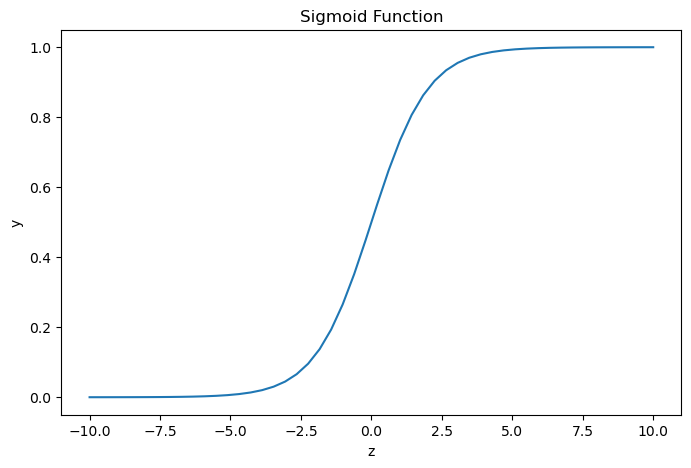

In [27]:
z = np.linspace(-10, 10, 50)   
y = 1/(1 + np.exp(-z))
plt.title("Sigmoid Function")
plt.xlabel("z") 
plt.ylabel("y")  
plt.plot(z, y) 
plt.show()

In our case, the Logistic regression model is binomial, as target variable can only have 2 possible values "0" or "1", which represent "income <= 50K" and "income > 50k" respectively.

In [28]:
from sklearn.linear_model import LogisticRegression

log_model = LogisticRegression(random_state=RANDOM_STATE, max_iter=1000)
clf_logistic = Pipeline(steps=[("preprocessor", preprocessor), ("classifier", log_model)])

In [29]:
clf_logistic.fit(X_train, y_train)

,steps,"[('preprocessor', ...), ('classifier', ...)]"
,transform_input,None
,memory,None
,verbose,False
,transformers,"[('num', ...)]"
,remainder,'drop'
,sparse_threshold,0.3
,n_jobs,None
,transformer_weights,None
,verbose,False
,verbose_feature_names_out,True


## RANDOM FOREST CLASSIFICATION
The Random Forest Classifier is a set of decision trees from randomly selected subset of training set. It aggregates the votes from different decision trees to decide the final class of the test object. It is an ensemble tree-based learning algorithm.

In [30]:
from sklearn.ensemble import RandomForestClassifier

rf_model = RandomForestClassifier(random_state=RANDOM_STATE, n_estimators=100)
clf_random_forest = Pipeline(steps=[("preprocessor", preprocessor), ("classifier", rf_model)])

In [31]:
clf_random_forest.fit(X_train, y_train)

,steps,"[('preprocessor', ...), ('classifier', ...)]"
,transform_input,None
,memory,None
,verbose,False
,transformers,"[('num', ...)]"
,remainder,'drop'
,sparse_threshold,0.3
,n_jobs,None
,transformer_weights,None
,verbose,False
,verbose_feature_names_out,True


## XGBOOST CLASSIFICATION
EXPLICAR ESTE MODELO

In [32]:
from xgboost import XGBClassifier

xgb_model = XGBClassifier(use_label_encoder = False, eval_metric = "logloss", random_state=RANDOM_STATE)
clf_xgb = Pipeline(steps=[("preprocessor", preprocessor), ("classifier", xgb_model)])

In [33]:
clf_xgb.fit(X_train, y_train)

,steps,"[('preprocessor', ...), ('classifier', ...)]"
,transform_input,None
,memory,None
,verbose,False
,transformers,"[('num', ...)]"
,remainder,'drop'
,sparse_threshold,0.3
,n_jobs,None
,transformer_weights,None
,verbose,False
,verbose_feature_names_out,True


In [34]:
models = {
    "Logistic Regression": clf_logistic,
    "Random Forest": clf_random_forest,
    "XGBoost": clf_xgb
}

## MODEL EVALUATION

Accuracy is one of the main metrics for evaluating classification models. Accuracy is the proportion of predictions our model got right. Formally, accuracy has the following definition:

$$ Accuracy = \frac{TP + TN}{TP + TN + FP + FN}

Accuracy alone doesn't tell the full story when you're working with a class-imbalanced data set, where there is a significant disparity between the number of positive and negative labels. Metrics for evaluating class-imbalanced problems are precision and recall.

2025/09/24 18:50:34 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.
2025/09/24 18:50:41 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.
2025/09/24 18:50:45 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.


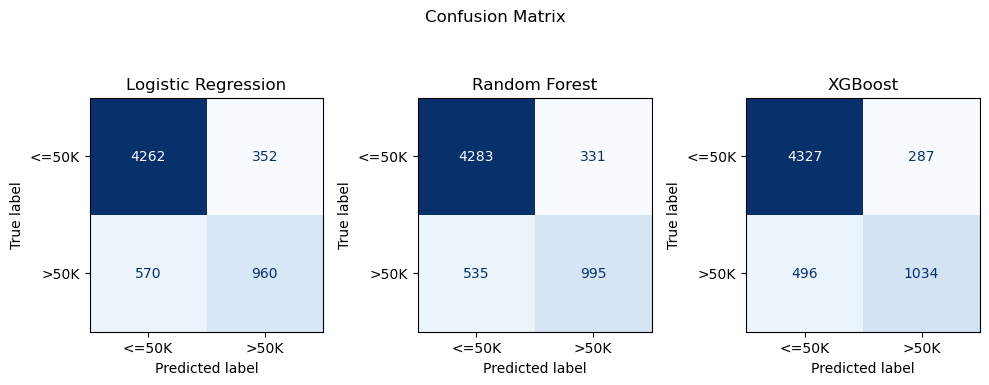

                     Accuracy  Precision    Recall  F1 Score
Logistic Regression  0.849935   0.731707  0.627451  0.675581
Random Forest        0.859049   0.750377  0.650327  0.696779
XGBoost              0.872559   0.782740  0.675817  0.725360


In [37]:
results = {}
fig, axes = plt.subplots(1, len(models), figsize=(10, 4))

for i, (name, model) in enumerate(models.items()):
    with mlflow.start_run(run_name=name):
        # Train
        model.fit(X_train, y_train)
        y_pred = model.predict(X_test)

        # Evaluation metrics
        accuracy = accuracy_score(y_test, y_pred)
        precision = precision_score(y_test, y_pred)
        recall = recall_score(y_test, y_pred)
        f1 = f1_score(y_test, y_pred)
        results[name] = {
            "Accuracy": accuracy,
            "Precision": precision,
            "Recall": recall,
            "F1 Score": f1
        }

        # Log metrics
        mlflow.log_metric("accuracy", accuracy)
        mlflow.log_metric("precision", precision)
        mlflow.log_metric("recall", recall)
        mlflow.log_metric("f1_score", f1)

        # Log model
        mlflow.sklearn.log_model(model, name= "model")

        # Confusion matrix
        cf = confusion_matrix(y_test, y_pred)
        disp = ConfusionMatrixDisplay(confusion_matrix=cf, display_labels=["<=50K", ">50K"])
        disp.plot(cmap=plt.cm.Blues, ax= axes[i], colorbar=False)
        axes[i].set_title(f"{name}")

fig.suptitle("Confusion Matrix")
plt.tight_layout()
plt.show()
results_df = pd.DataFrame(results).T
print(results_df)

In [132]:
best_model_name = results_df["F1 Score"].idxmax()
print("Best model:", best_model_name)

Best model: XGBoost


## SAVING OUR MODELS

The last step is saving our models. We will load them and discuss results and grab conclusions in the notebook named **03_results_and_conclusions.ipynb**.

In [104]:
import os 
os.makedirs("../models", exist_ok=True)

In [107]:
joblib.dump(clf_logistic, "../models/logistic_regression.joblib")
joblib.dump(clf_random_forest, "../models/random_forest.joblib")
joblib.dump(clf_xgb, "../models/xgboost.joblib");